<a href="https://colab.research.google.com/github/LazySeagull/classification--algo-questions/blob/main/classification_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784" , as_frame = False)

In [45]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']

print(X.shape , "\n")
print(y.shape)

type(X)



(70000, 784) 

(70000,)


numpy.ndarray

In [8]:
import matplotlib.pyplot as plt


In [ ]:
def print_digit(X , index : int , Y) -> None :
  digit = X[index]
  plt.imshow(digit.reshape(28 , 28) , cmap = "binary")
  plt.axis("off")
  plt.show()
  Y_digit = Y[index]
  print(F"\nThe digit is {Y_digit}")


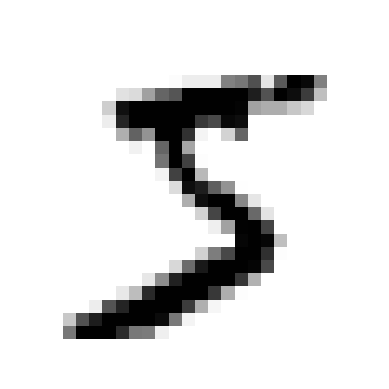


The digit is 5


In [10]:
print_digit(X , 0 , y)

In [5]:
X_train , y_train , X_test , y_test = X[:60000] , y[:60000] , X[60000:] , y[60000 : ]

In [15]:
type(X_train)

numpy.ndarray

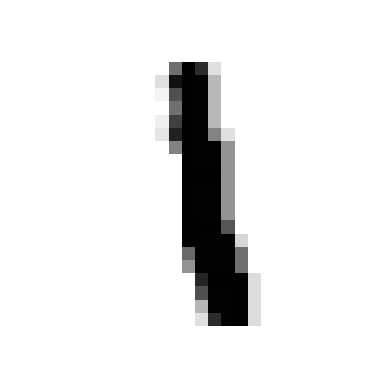


The digit is 1


In [12]:
print_digit(X_train , 6 , y_train)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print(knn_clf.predict([X_train.iloc[6]] ))

/home/ateeksh/mlrepos/mllibraries/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['1']


In [15]:
#cross val

from sklearn.model_selection import cross_val_score


score = cross_val_score(knn_clf , X_train , y_train , cv = 5 , scoring="accuracy")
print(score)

[0.96975    0.97016667 0.96933333 0.96816667 0.969     ]


In [16]:
from sklearn.model_selection import cross_val_predict

y_pred_train = cross_val_predict(knn_clf , X_train , y_train , cv=3)

In [17]:
from sklearn.metrics import precision_score , recall_score

recall = recall_score(y_train , y_pred_train, average='macro')
print(recall , "\n")
precision = precision_score(y_train , y_pred_train, average='macro')
print(precision , "\n")

0.9669341316176434 

0.967895609653832 



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.4s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  13.3s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  12.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  14.6s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  12.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  16.3s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  14.3s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  14.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  14.4s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  13.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [3, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [19]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [20]:
grid_search.best_score_

np.float64(0.9716166666666666)

In [21]:
knn_best_grid = grid_search.best_estimator_

In [22]:
knn_best_self = KNeighborsClassifier(n_neighbors = 4 , weights = "distance")
knn_best_self.fit(X_train , y_train)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
y_pred_grid = cross_val_predict(knn_best_grid , X_test , y_test , cv = 3)
y_pred_self = cross_val_predict(knn_best_self , X_test , y_test , cv = 3)

In [24]:
precision_score_grid_best = precision_score(y_pred_grid , y_test , average = "macro")
precision_score_self_best = precision_score(y_pred_self , y_test , average = "macro")

recall_score_grid_best = recall_score(y_pred_grid , y_test , average = "macro")
recall_score_self_best = recall_score(y_pred_self , y_test , average = "macro")



print(precision_score_grid_best,"\n")
print(precision_score_self_best , "\n" ,recall_score_grid_best , "\n" , recall_score_self_best )



0.9403856118462117 

0.9403856118462117 
 0.9422015858141111 
 0.9422015858141111


In [25]:
cross_val_score_best = cross_val_score(knn_best_self , X_test , y_test , cv = 5)
print(cross_val_score_best)

[0.9305 0.9375 0.9445 0.9655 0.968 ]


In [26]:
print(grid_search.best_score_)

0.9716166666666666


In [53]:
# question 2







#shifting the image then add that into the training set and then see the results


In [7]:
#question 2 yeah in which i have to change the thing yeah ima see init 
import numpy as np

In [8]:
type(X_train)


numpy.ndarray

In [9]:
from scipy.ndimage import shift

def image_shift(image , x , y):
    image = image.reshape((28 , 28))
    shifted_image = shift(image , [x , y] , cval=0)
    
    return shifted_image.reshape(784)
    
    
 

In [10]:
X_augmented , y_augmented= [image for image in X_train] , [label for label in y_train]

In [11]:
for x , y in ((1,0) , (-1,0) , (0,1) , (0,-1)):
    for image , label in zip(X_train , y_train):
        X_augmented.append(image_shift(image , x , y))
        y_augmented.append(label)
    
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)
    
    
    

In [12]:
X_augmented.shape


(300000, 784)

In [13]:
y_augmented.shape

(300000,)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf_augmented = KNeighborsClassifier()

In [15]:
knn_clf_augmented.fit(X_augmented , y_augmented)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
from sklearn.model_selection import cross_val_predict , cross_val_score

score_augmented = cross_val_score(knn_clf_augmented , X_augmented , y_augmented , cv=3 , scoring="accuracy") 

: 